### 최종 해결 방안
1. 주소를 정제 (필요한 부분만 잘라냄)
2. 주소를 좌표로 변환 (지오서비스 www.geoservice.co.kr:777 활용해서 추출)
3. kakao API를 활용해 좌표를 다시 주소로 변환, 행정동만 추출

### 어린이집 주소 정제

In [1]:
import pandas as pd

In [2]:
def get_addrs(x): 
    addr = x.split()

In [3]:
childhouse = pd.read_csv("서울시 어린이집 정보.csv")
childhouse

,시군구명,어린이집코드,어린이집명,어린이집유형,운영현황,우편번호,상세주소,전화번호,팩스번호,홈페이지주소,...,교직원현황-보육교사,교직원현황-특수교사,교직원현황-치료교사,교직원현황-영양사,교직원현황-간호사,교직원현황-간호조무사,교직원현황-조리원,교직원현황-사무직원,교직원현황-총계,데이터수집일
0,서대문구,11410000379,사랑별어린이집,국공립,정상,3712.0,서울특별시 서대문구 수색로2길 19-7 DMC금호리첸시아아파트 단지 내,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,03:35.0
1,중구,11140000123,현대캐피탈 도담어린이집,직장,정상,4527.0,서울특별시 중구 세종대로 14 그랜드센트럴 2층 현대캐피탈 도담어린이집,02-6411-6191,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,18:44.0
2,광진구,11215000364,광진구육아종합지원센터(꾸미팡팡공동육아방 3호점),국공립,정상,4999.0,서울특별시 광진구 동일로56가길 31 3층,02-466-1827,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,02:15.0
3,영등포구,11560000498,삼환어린이집,국공립,정상,7227.0,서울특별시 영등포구 영중로 145 영등포삼환아파트 104동 101호,02-2679-5967,NaN,NaN,...,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7.0,04:35.0
4,구로구,11530000648,별숲어린이집,국공립,정상,8226.0,서울특별시 구로구 경인로43길 49 고척아이파크MD 내 관리실,02-860-0000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04:16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9361,노원구,11350000997,가람방과후어린이집,사회복지법인,폐지,1851.0,서울특별시 노원구 섬밭로 156,02-975-2464,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,03:16.0
9362,강남구,11680000372,언북몬테소리어린이집,민간,폐지,135100.0,서울 강남구 청담동,02-546-3369,070-8118-3362,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13:35.0
9363,은평구,11380000532,한소리어린이집,민간,폐지,122908.0,서울 은평구 응암1동 98-15,02-388-7683,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,03:26.0
9364,은평구,11380000510,꿈동이그림놀이방,가정,폐지,122010.0,서울 은평구 응암동 288-12,02-309-7374,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,03:26.0


In [4]:
df_geo = childhouse.copy()
df_geo['상세주소'] = df_geo['상세주소'].fillna("") # 결측치 처리를 해주지 않으면, 주소 변환할 때 에러 발생
df_geo.drop(df_geo[df_geo['상세주소'] == ''].index, inplace = True) # 주소가 없는 행 제거

In [5]:
df_geo['주소 변환'] = df_geo['상세주소'].apply(get_addrs)

In [6]:
df_geo[['주소 변환']][:5000].to_csv("어린이집주소1.csv", encoding='utf-8-sig') # 데이터 개수가 많아서 csv 분할

In [7]:
df_geo[['주소 변환']][5000:].to_csv("어린이집주소2.csv", encoding='utf-8-sig')

### kakao API

In [8]:
import json
import requests
import pandas as pd
import numpy as np

In [9]:
# api 정보 
URL = "https://dapi.kakao.com/v2/local/geo/coord2regioncode.json"
REST_API_KEY = 'fdc7a6d52823a8bcba5a14271deedc9f'
headers = {"Authorization":"KakaoAK {}".format(REST_API_KEY)}

In [10]:
# 행정동 추출 함수
def dong_extraction(data): 
    dongs = [] # 행정동 리스트
    
    for idx in range(len(data['x'])):
        x = data['x'][idx] ; y = data['y'][idx]
        
        url = '%s?x=%s&y=%s' %(URL, x, y)  # URL에 위도, 경도 들어가는 형태   
        resp = requests.get(url, headers=headers) 

        # json request
        try:
            json_data = json.loads(resp.text)
            dong = json_data.get('documents')[1]['region_3depth_name']
            dongs.append(dong)
            print(idx, dong)
        except:
            dong = np.NaN
            dongs.append(dong)
            print(idx, dong)
            
    return dongs

#### 어린이집 데이터 행정동 추출
- 데이터 개수가 많아서 데이터 나눠서 돌림
- 위도&경도는 지오서비스 활용해서 추출


In [14]:
df1 = pd.read_csv("어린이집주소1_위도경도.csv") # 어린이집 데이터 5000개 중 상세주소 및 위도경도 데이터
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   field1    5000 non-null   int64  
 1   field2    5000 non-null   object 
 2   _GC_TYPE  5000 non-null   object 
 3   _X        5000 non-null   float64
 4   _Y        5000 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 195.4+ KB


In [17]:
xy1 = dict(x=list(df1._X), y =(df1._Y)) # 위도, 경도 합친 dict 정의
len(xy1['x'])

5000

In [16]:
df2 = pd.read_csv("어린이집주소2_위도경도.csv") # 나머지 어린이집 데이터 중 상세주소 및 위도경도 데이터

In [ ]:
xy2 = dict(x=list(df2._X), y =(df2._Y)) 
len(xy2['x'])

In [18]:
# API 돌리기
result1 = dong_extraction(xy1)

0 남가좌1동
1 고척1동
2 영등포동
3 군자동
4 회현동
5 염리동
6 면목4동
7 원효로1동
8 구로3동
9 여의동
10 석촌동
11 신길1동
12 조원동
13 신정6동
14 대치2동
15 불광1동
16 신정2동
17 망우본동
18 도화동
19 성산2동
20 방화1동
21 응암2동
22 망우3동
23 사당2동
24 목3동
25 홍제3동
26 증산동
27 진관동
28 등촌1동
29 홍제1동
30 용강동
31 장안2동
32 보문동
33 정릉3동
34 종로5.6가동
35 삼청동
36 망우본동
37 아현동
38 상일2동
39 여의동
40 공릉2동
41 북아현동
42 시흥1동
43 신내1동
44 서초4동
45 구의1동
46 위례동
47 신대방2동
48 거여2동
49 가양1동
50 신사2동
51 길음2동
52 위례동
53 시흥3동
54 교남동
55 송파2동
56 흑석동
57 응암2동
58 고척1동
59 종로1.2.3.4가동
60 길음2동
61 수색동
62 성수1가2동
63 용신동
64 신사1동
65 위례동
66 방배2동
67 반포1동
68 위례동
69 삼성2동
70 망우본동
71 망우본동
72 신대방1동
73 서초2동
74 방배3동
75 자양4동
76 아현동
77 항동
78 신정3동
79 오금동
80 위례동
81 방학3동
82 대치2동
83 고척2동
84 역삼1동
85 증산동
86 신사동
87 사당2동
88 화곡4동
89 반포1동
90 농소동
91 응암1동
92 연남동
93 개포2동
94 자양1동
95 망우본동
96 대치2동
97 발산1동
98 농소동
99 중곡3동
100 염리동
101 갈현1동
102 길동
103 홍은1동
104 등촌1동
105 성현동
106 한강로동
107 대림3동
108 이태원1동
109 신정7동
110 답십리1동
111 염리동
112 대림1동
113 사직동
114 면목2동
115 진관동
116 노량진1동
117 목3동
118 창3동
119 홍은1동
120 위례동
121 등촌3동
122 일원1동
123 아현동
124 개봉2동
125 상계10동


947 남가좌2동
948 상계8동
949 쌍문4동
950 낙성대동
951 위례동
952 세곡동
953 공항동
954 이문1동
955 목4동
956 하계2동
957 답십리1동
958 망원1동
959 이문2동
960 응암2동
961 중계1동
962 문정2동
963 신촌동
964 당산1동
965 답십리1동
966 창4동
967 상계8동
968 금호1가동
969 전농1동
970 상계6.7동
971 삼각산동
972 황학동
973 갈현2동
974 상암동
975 망원2동
976 한강로동
977 삼각산동
978 서강동
979 상암동
980 창4동
981 공항동
982 종암동
983 삼각산동
984 목1동
985 풍납1동
986 신사동
987 서원동
988 송천동
989 장지동
990 을지로동
991 월곡1동
992 효창동
993 사당2동
994 성수2가3동
995 장안2동
996 정릉4동
997 창2동
998 개봉2동
999 구로2동
1000 부주동
1001 쌍문2동
1002 중계1동
1003 공항동
1004 양평2동
1005 가산동
1006 신길4동
1007 성내3동
1008 중곡1동
1009 거여2동
1010 길음1동
1011 북아현동
1012 당산2동
1013 도봉1동
1014 북아현동
1015 진북동
1016 도봉2동
1017 문정2동
1018 이문1동
1019 논현2동
1020 등촌1동
1021 보라매동
1022 서강동
1023 창신3동
1024 성수2가1동
1025 명일2동
1026 중마동
1027 우이동
1028 신길7동
1029 위례동
1030 충무동
1031 미성동
1032 천호3동
1033 석관동
1034 장위3동
1035 망원1동
1036 삼각산동
1037 잠실2동
1038 낙성대동
1039 송중동
1040 갈현1동
1041 성산2동
1042 위례동
1043 역촌동
1044 상계6.7동
1045 신정7동
1046 상암동
1047 종암동
1048 고덕1동
1049 구로1동
1050 종암동
1051 문정2동
1052 서초2동
1053 보정동
1054 불광1동

1794 용강동
1795 휘경2동
1796 전농1동
1797 부개1동
1798 세곡동
1799 성수1가2동
1800 응봉동
1801 가양1동
1802 중곡2동
1803 후암동
1804 창1동
1805 오류2동
1806 청림동
1807 공덕동
1808 세곡동
1809 명동
1810 수색동
1811 원효로1동
1812 응암1동
1813 종암동
1814 신도림동
1815 장안1동
1816 역삼2동
1817 미성동
1818 신정2동
1819 광장동
1820 오류2동
1821 구로5동
1822 성현동
1823 수서동
1824 오류1동
1825 목4동
1826 인헌동
1827 을지로동
1828 안암동
1829 신사1동
1830 응암2동
1831 상도1동
1832 위례동
1833 양재1동
1834 화곡6동
1835 신사1동
1836 양평2동
1837 잠실4동
1838 신대방2동
1839 개포4동
1840 방화1동
1841 신내1동
1842 묵1동
1843 여의동
1844 평창동
1845 염창동
1846 삼성2동
1847 신대방1동
1848 양재1동
1849 가회동
1850 신월5동
1851 석관동
1852 내곡동
1853 신사1동
1854 양재1동
1855 금호1가동
1856 잠실2동
1857 위례동
1858 북가좌2동
1859 천연동
1860 잠실3동
1861 용강동
1862 가락본동
1863 구로3동
1864 가락2동
1865 합정동
1866 성현동
1867 길동
1868 위례동
1869 세곡동
1870 성산2동
1871 양재1동
1872 판부면
1873 월곡2동
1874 신정6동
1875 홍제1동
1876 성내1동
1877 장지동
1878 금호2.3가동
1879 등촌3동
1880 홍제2동
1881 양재1동
1882 우장산동
1883 명동
1884 남현동
1885 전농1동
1886 내곡동
1887 쌍문2동
1888 등촌2동
1889 양재1동
1890 세곡동
1891 화곡8동
1892 양평1동
1893 응봉동
1894 오금동
1895 자양2동
1896 길음1동
1897 

2634 삼각산동
2635 번3동
2636 신정3동
2637 잠실2동
2638 사당3동
2639 사당2동
2640 신정3동
2641 성내1동
2642 서초3동
2643 창1동
2644 삼각산동
2645 양재1동
2646 답십리2동
2647 공덕동
2648 남가좌2동
2649 구로5동
2650 망원2동
2651 삼각산동
2652 신정3동
2653 효창동
2654 반포4동
2655 오금동
2656 마천1동
2657 홍은1동
2658 망원1동
2659 가양1동
2660 상계8동
2661 성산2동
2662 사당2동
2663 방화1동
2664 오류2동
2665 휘경2동
2666 행당2동
2667 이태원1동
2668 성내1동
2669 반포1동
2670 오류2동
2671 명일2동
2672 삼성2동
2673 풍납2동
2674 암사1동
2675 시흥5동
2676 이촌2동
2677 북가좌2동
2678 상도2동
2679 창1동
2680 중화1동
2681 등촌2동
2682 가락2동
2683 잠실본동
2684 가양3동
2685 오류2동
2686 삼전동
2687 교남동
2688 역삼1동
2689 신정3동
2690 마장동
2691 노량진1동
2692 삼각산동
2693 오류2동
2694 반포4동
2695 세곡동
2696 종암동
2697 오류2동
2698 행당2동
2699 수궁동
2700 서초2동
2701 삼각산동
2702 대흥동
2703 마천2동
2704 가락본동
2705 성내2동
2706 오류2동
2707 가양1동
2708 이촌1동
2709 신대방2동
2710 진관동
2711 이촌2동
2712 상도2동
2713 양평2동
2714 오류2동
2715 응봉동
2716 은행동
2717 사당2동
2718 가양3동
2719 신정7동
2720 수서동
2721 대방동
2722 사당2동
2723 양평1동
2724 창1동
2725 양재1동
2726 시흥1동
2727 노량진1동
2728 삼전동
2729 가산동
2730 삼전동
2731 응봉동
2732 왕십리2동
2733 서강동
2734 망원1동
2735 신

3481 행당2동
3482 이문1동
3483 청운효자동
3484 신정5동
3485 잠실4동
3486 창2동
3487 신도림동
3488 쌍문1동
3489 장지동
3490 강일동
3491 신월5동
3492 마천2동
3493 화곡본동
3494 잠원동
3495 행운동
3496 장지동
3497 난곡동
3498 강일동
3499 신촌동
3500 서빙고동
3501 명일2동
3502 풍납2동
3503 신내2동
3504 여의동
3505 발산1동
3506 구로5동
3507 신정6동
3508 북아현동
3509 잠실2동
3510 쌍문4동
3511 답십리2동
3512 석촌동
3513 신월6동
3514 화순읍
3515 장위3동
3516 서초2동
3517 암사2동
3518 신월7동
3519 진관동
3520 개봉3동
3521 강일동
3522 개포3동
3523 답십리2동
3524 응봉동
3525 신정2동
3526 진관동
3527 삼성2동
3528 중계2.3동
3529 화곡1동
3530 반포2동
3531 장위3동
3532 창5동
3533 월곡2동
3534 신도림동
3535 노량진2동
3536 잠실2동
3537 구로1동
3538 장지동
3539 제기동
3540 잠실4동
3541 신월2동
3542 남현동
3543 행당2동
3544 개포2동
3545 염창동
3546 고덕2동
3547 공릉2동
3548 방화3동
3549 신길4동
3550 도개면
3551 서강동
3552 잠실4동
3553 종로1.2.3.4가동
3554 신월2동
3555 공항동
3556 둔촌2동
3557 운암2동
3558 신월1동
3559 미성동
3560 번1동
3561 개포2동
3562 강일동
3563 청파동
3564 오류2동
3565 방배4동
3566 강일동
3567 신월1동
3568 천호3동
3569 신사동
3570 홍은1동
3571 화곡8동
3572 강일동
3573 도봉2동
3574 삼성2동
3575 망원2동
3576 잠실4동
3577 답십리2동
3578 암사2동
3579 목1동
3580 창4동
3581 도화동
3582 신내2동


4318 녹번동
4319 화곡1동
4320 반포3동
4321 신도림동
4322 연희동
4323 인헌동
4324 중곡4동
4325 월곡1동
4326 화곡본동
4327 고덕1동
4328 중곡4동
4329 망우본동
4330 월계3동
4331 하계2동
4332 신도림동
4333 신월5동
4334 은천동
4335 자양1동
4336 월계3동
4337 화곡3동
4338 오류2동
4339 신월4동
4340 망원2동
4341 신정3동
4342 흑석동
4343 독산2동
4344 녹번동
4345 홍은2동
4346 방학3동
4347 장안1동
4348 풍납2동
4349 신대방2동
4350 상도4동
4351 상도1동
4352 신사2동
4353 송천동
4354 녹번동
4355 여의동
4356 창1동
4357 서교동
4358 사당3동
4359 대조동
4360 용강동
4361 난향동
4362 장안2동
4363 신월4동
4364 석관동
4365 망우본동
4366 성내3동
4367 장안1동
4368 신내1동
4369 중계2.3동
4370 여의동
4371 공덕동
4372 개봉3동
4373 중계4동
4374 화곡3동
4375 방화3동
4376 신월1동
4377 송파2동
4378 연희동
4379 상계6.7동
4380 신길3동
4381 역촌동
4382 상계5동
4383 마천2동
4384 난향동
4385 석촌동
4386 응암1동
4387 화곡3동
4388 공릉2동
4389 신길7동
4390 서교동
4391 화곡6동
4392 방배2동
4393 대림2동
4394 구산동
4395 상도2동
4396 답십리2동
4397 남가좌2동
4398 중계1동
4399 공릉2동
4400 월계2동
4401 월계1동
4402 월곡1동
4403 잠원동
4404 화곡8동
4405 면목4동
4406 을지로동
4407 묵2동
4408 신정7동
4409 신월7동
4410 갈현2동
4411 신월5동
4412 신월4동
4413 신길3동
4414 정릉1동
4415 한남동
4416 구산동
4417 신사1동
4418 신대방2동
4419 창2동


In [19]:
np.count_nonzero(result1) # NaN값 있는지 확인

5000

In [ ]:
result2 = dong_extraction(xy2)

In [ ]:
np.count_nonzero(result2) # NaN값 있는지 확인

In [ ]:
df_geo['행정동명'] = result1 + result2

In [ ]:
df_geo

In [ ]:
df_geo.to_csv("서울시_어린이집_정보_행정동.csv", encoding='utf-8-sig')

#### 유원시설업(키즈카페) 행정동 추출

In [20]:
kids = pd.read_csv("서울시 유원시설업(기타) 인허가 정보.csv")
kids

,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태코드,영업상태명,상세영업상태코드,상세영업상태명,폐업일자,휴업시작일자,...,발전시설유무,의무실유무,안내소유무,기획여행보험시작일자,기획여행보험종료일자,자본금,보험시작일자,보험종료일자,부대시설내역,시설규모
0,3230000,CDFI5272002018000001,2018-03-13,NaN,3,폐업,3,폐업,2023-02-27,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3140000,CDFI5272002022000001,2022-10-26,NaN,1,영업/정상,13,영업중,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3240000,CDFI5272002020000001,2020-03-24,NaN,1,영업/정상,13,영업중,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3240000,CDFI5272002019000001,2019-04-25,NaN,1,영업/정상,13,영업중,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3240000,CDFI5272002017000005,2017-06-30,NaN,1,영업/정상,13,영업중,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,3240000,CDFI5272002016000003,20160407,NaN,1,영업/정상,13,영업중,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
510,3240000,CDFI5272002012000002,20120716,NaN,1,영업/정상,BBBB,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0
511,3240000,CDFI5272002014000003,20140711,NaN,1,영업/정상,BBBB,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
512,3240000,CDFI5272002021000001,2021-04-22,NaN,1,영업/정상,13,영업중,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df3 = pd.read_csv("유원시설업_위도경도.csv")
df3.head()

,field1,field2,field3,field4,field5,field6,field7,field8,field9,field10,...,field54,field55,field56,field57,field58,field59,field60,_GC_TYPE,_X,_Y
0,3240000,CDFI5272002017000004,2017-06-23,NaN,1,영업/정상,13,영업중,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,정,127.127101,37.554037
1,3240000,CDFI5272002019000001,2019-04-25,NaN,1,영업/정상,13,영업중,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,정,127.144185,37.546671
2,3240000,CDFI5272002017000005,2017-06-30,NaN,1,영업/정상,13,영업중,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,정,127.143418,37.553400
3,3140000,CDFI5272002022000001,2022-10-26,NaN,1,영업/정상,13,영업중,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,정,126.876084,37.529373
4,3240000,CDFI5272002020000001,2020-03-24,NaN,1,영업/정상,13,영업중,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,정,127.142251,37.545717


In [22]:
xy3 = dict(x=list(df3._X), y =(df3._Y)) 
len(xy3['x'])

514

In [23]:
result3 = dong_extraction(xy3)

0 암사2동
1 명일1동
2 명일1동
3 목1동
4 천호1동
5 잠실6동
6 세곡동
7 천호3동
8 성내1동
9 천호1동
10 양재2동
11 서초4동
12 방배본동
13 신길1동
14 방학1동
15 구로5동
16 회기동
17 용답동
18 공덕동
19 석관동
20 월곡2동
21 방학1동
22 서교동
23 장안2동
24 종암동
25 서초1동
26 자양3동
27 고척1동
28 역촌동
29 신촌동
30 사당3동
31 월곡2동
32 방화2동
33 오륜동
34 반포4동
35 월계3동
36 진관동
37 성산1동
38 군자동
39 월계3동
40 쌍문1동
41 중곡1동
42 답십리2동
43 종로1.2.3.4가동
44 신도림동
45 북아현동
46 인수동
47 장안2동
48 광희동
49 공덕동
50 교남동
51 한강로동
52 역삼1동
53 전농1동
54 은천동
55 서초4동
56 석관동
57 월곡1동
58 사당1동
59 미성동
60 장안2동
61 장안2동
62 등촌3동
63 자양3동
64 종암동
65 신촌동
66 창2동
67 정릉1동
68 수유1동
69 자양3동
70 창1동
71 남영동
72 삼성1동
73 가양2동
74 고척1동
75 화양동
76 망원1동
77 진관동
78 화곡1동
79 고덕1동
80 서교동
81 창5동
82 황학동
83 영등포동
84 서교동
85 염창동
86 성산2동
87 개포2동
88 대방동
89 방학3동
90 휘경2동
91 중계본동
92 서초4동
93 반포4동
94 도봉2동
95 구의3동
96 성내2동
97 잠원동
98 고척1동
99 반포4동
100 아현동
101 답십리1동
102 성산1동
103 염리동
104 중곡2동
105 여의동
106 화양동
107 난향동
108 양재1동
109 길동
110 암사2동
111 종로1.2.3.4가동
112 방학1동
113 중곡3동
114 신정3동
115 여의동
116 구로1동
117 송중동
118 광희동
119 종로1.2.3.4가동
120 사당4동
121 동화동
122 사당2동
123 명일1동
124 효창동
125 신도림동

In [ ]:
kids['행정동명'] = result3
kids

In [ ]:
kids.to_csv("서울시_유원시설업_정보_행정동.csv", encoding='utf-8-sig')

- 단점: 지오서비스는 일부 유료 서비스라, 무료로 이용하기 위해서는 너무 오래 걸림 (10시간이 넘도록 안됨,,)
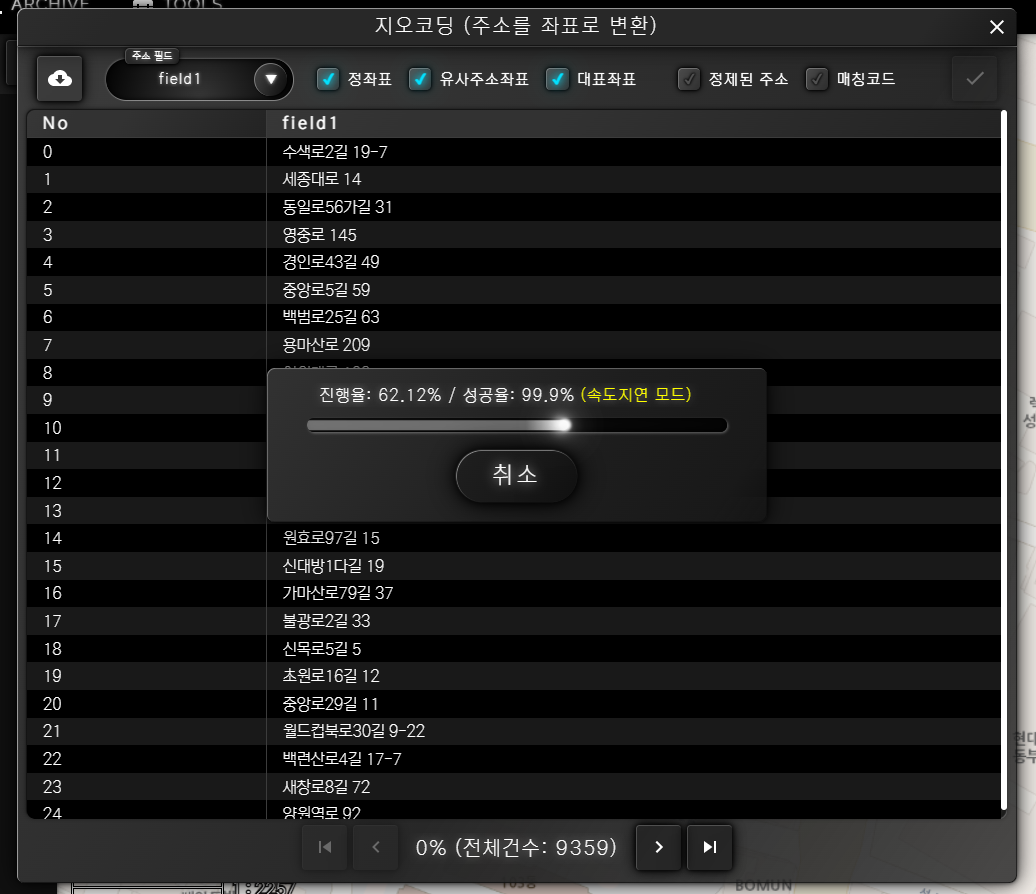